## Install the needed libraries

In [ ]:
# !pip install --upgrade pip
# !pip install --upgrade setuptools
# !apt-get install -y python3-dev
# !pip install scikit-learn
# !pip3 install pyproject.toml-based

In [2]:
!pip3 install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 60.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 70.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 48.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=590cb4e018e8cd0ec1cf8133b78c0c2752f560afbae62834a59511a3c38283ed
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

### Import the needed libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Function to compute the metrics

In [5]:
def compute_classification_report(true_labels_column, predicted_labels_column):
    report = classification_report(true_labels_column, predicted_labels_column)
    accuracy = accuracy_score(true_labels_column, predicted_labels_column)
    precision = precision_score(true_labels_column, predicted_labels_column, average='macro')
    recall = recall_score(true_labels_column, predicted_labels_column, average='macro')
    f1 = f1_score(true_labels_column, predicted_labels_column, average='macro')

    print("Classification Report:")
    print(report)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    return accuracy, precision, recall, f1

# Function to plot the metrics

In [6]:
def plot_metrics(labels, accuracy_values):

    accuracy_values_scaled = [value * 100 for value in accuracy_values]

    # Create a counter plot
    fig, ax = plt.subplots()
    bar_width = 0.2  # Smaller width
    index = np.arange(len(labels))

    bars = ax.bar(index, accuracy_values_scaled, bar_width)

    # Add values on top of the bars
    for bar, value in zip(bars, accuracy_values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
                f'{value:.2f}%', ha='center', va='bottom')

    ax.set_xlabel('Datasets')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('BERT Accuracy Comparison')
    ax.set_xticks(index)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# BERT for 4 topics

## Read data

In [7]:
df2 = pd.read_csv("https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv")
df2.columns = ["label" , "title" , "content"]
df2['label'] = df2['label'].map({1: "world", 2: "sports", 3: "business", 4: "sci/tech"})


In [8]:
df2

,label,title,content
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
...,...,...,...
119994,world,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119995,sports,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119996,sports,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119997,sports,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [9]:
df2.label.value_counts()

sci/tech    30000
sports      30000
world       30000
business    29999
Name: label, dtype: int64

In [10]:
X = df2.content
Y = df2.label

## Split the data

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(X,Y , shuffle=True, test_size = 0.9, random_state = 12342 , stratify=Y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, shuffle=True, test_size = 0.9, random_state = 12342 , stratify=y_temp)


In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(11999,)
(11999,)
(10800,)
(10800,)
(97200,)
(97200,)


In [15]:
x_train = X_train.values
x_val = X_val.values
y_train = y_train.values
y_val = y_val.values
x_test = X_test.values
y_test = y_test.values

## Text preprocessing

In [16]:
(x_train_bert,  y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                                         x_test = x_val, y_test=y_val,
                                                                                          preprocess_mode='bert',
                                                                                          lang = 'en',
                                                                                          maxlen = 512,
                                                                                          max_features=36000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


## Download the model

In [17]:
model = text.text_classifier('bert', train_data=(x_train_bert, y_train_bert), preproc=preproc)
learner_1 = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=6)
learner_2 = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=6)

Is Multi-Label? False
maxlen is 512


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


## Using the cyclical learning rate policy

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/4
2000/2000 [==============================] - 399s 188ms/step - loss: 0.8839 - accuracy: 0.6363
Epoch 2/4
2000/2000 [==============================] - 377s 188ms/step - loss: 0.7978 - accuracy: 0.6428
Epoch 3/4
2000/2000 [==============================] - 8s 4ms/step - loss: 1.5991 - accuracy: 0.1958


done.
Visually inspect loss plot and select learning rate associated with falling loss
Three possible suggestions for LR from plot:
	Longest valley (red): 2.23E-06
	Min numerical gradient (purple): 9.33E-06
	Min loss divided by 10 (omitted from plot): 2.79E-06


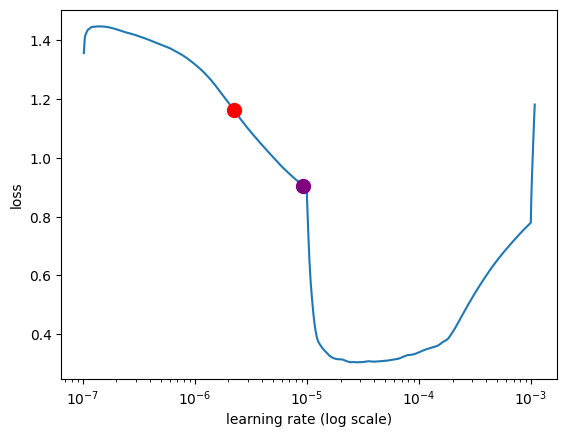

In [18]:
learner_1.lr_find(show_plot=True, max_epochs=4, suggest= True)             # briefly simulate training to find good learning rate

In [19]:
learner_1.fit_onecycle(9.33E-06, 5)



begin training using onecycle policy with max lr of 9.33e-06...
Epoch 1/5
2000/2000 [==============================] - 505s 243ms/step - loss: 0.5364 - accuracy: 0.8111 - val_loss: 0.2704 - val_accuracy: 0.9089
Epoch 2/5
2000/2000 [==============================] - 482s 241ms/step - loss: 0.2484 - accuracy: 0.9162 - val_loss: 0.2362 - val_accuracy: 0.9192
Epoch 3/5
2000/2000 [==============================] - 482s 241ms/step - loss: 0.1684 - accuracy: 0.9415 - val_loss: 0.2519 - val_accuracy: 0.9188
Epoch 4/5
2000/2000 [==============================] - 482s 241ms/step - loss: 0.0802 - accuracy: 0.9747 - val_loss: 0.2628 - val_accuracy: 0.9209
Epoch 5/5
2000/2000 [==============================] - 482s 241ms/step - loss: 0.0314 - accuracy: 0.9909 - val_loss: 0.2914 - val_accuracy: 0.9220


In [20]:
learner_1.validate(val_data=(x_val_bert, y_val_bert), class_names=["world", "sport", "business" , "sci/tech"])

338/338 [==============================] - 100s 283ms/step
              precision    recall  f1-score   support

       world       0.90      0.88      0.89      2700
       sport       0.89      0.89      0.89      2700
    business       0.98      0.98      0.98      2700
    sci/tech       0.92      0.94      0.93      2700

    accuracy                           0.92     10800
   macro avg       0.92      0.92      0.92     10800
weighted avg       0.92      0.92      0.92     10800



array([[2366,  236,   14,   84],
       [ 181, 2406,    8,  105],
       [  22,   16, 2635,   27],
       [  59,   59,   31, 2551]])

## Using the triangular learning rate policy

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/4
2000/2000 [==============================] - 377s 188ms/step - loss: 0.8530 - accuracy: 0.6616
Epoch 2/4
2000/2000 [==============================] - 377s 188ms/step - loss: 0.7829 - accuracy: 0.6561
Epoch 3/4
2000/2000 [==============================] - 10s 5ms/step - loss: 1.4847 - accuracy: 0.2451


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(




done.
Visually inspect loss plot and select learning rate associated with falling loss
Three possible suggestions for LR from plot:
	Longest valley (red): 1.60E-06
	Min numerical gradient (purple): 9.31E-06
	Min loss divided by 10 (omitted from plot): 2.47E-06


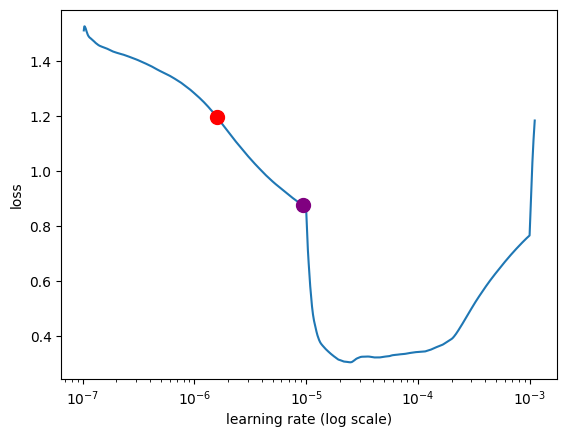

In [21]:
learner_2.lr_find(show_plot=True, max_epochs=4, suggest= True)             # briefly simulate training to find good learning rate

In [22]:
learner_2.autofit(9.31E-06)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 9.31e-06...
Epoch 1/1024
2000/2000 [==============================] - 497s 243ms/step - loss: 0.4240 - accuracy: 0.8505 - val_loss: 0.2370 - val_accuracy: 0.9170
Epoch 2/1024
2000/2000 [==============================] - 482s 241ms/step - loss: 0.2028 - accuracy: 0.9313 - val_loss: 0.2213 - val_accuracy: 0.9242
Epoch 3/1024
2000/2000 [==============================] - 481s 241ms/step - loss: 0.1405 - accuracy: 0.9540 - val_loss: 0.2307 - val_accuracy: 0.9255
Epoch 4/1024
2000/2000 [==============================] - ETA: 0s - loss: 0.0918 - accuracy: 0.9706
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 4.655e-06 (if not early_stopping).
2000/2000 [==============================] - 481s 241ms/step - loss: 0.0918 - accuracy: 0.9706 - val_loss: 0.2545 - val_accuracy: 0.9211
Epoch 5/1024
2000/2000 [=======

In [23]:
learner_2.validate(val_data=(x_val_bert, y_val_bert), class_names=["world", "sport", "business" , "sci/tech"])

338/338 [==============================] - 100s 283ms/step
              precision    recall  f1-score   support

       world       0.91      0.87      0.89      2700
       sport       0.87      0.92      0.90      2700
    business       0.97      0.98      0.98      2700
    sci/tech       0.94      0.93      0.93      2700

    accuracy                           0.92     10800
   macro avg       0.92      0.92      0.92     10800
weighted avg       0.92      0.92      0.92     10800



array([[2342,  275,   17,   66],
       [ 127, 2482,   10,   81],
       [  12,   17, 2652,   19],
       [  81,   71,   42, 2506]])

In [24]:
# getting predictor variable
predictor_1 = ktrain.get_predictor(learner_1.model, preproc)
predictor_2 = ktrain.get_predictor(learner_2.model, preproc)

In [25]:
y_pred_1 = predictor_1.predict(x_test.tolist())
y_pred_2 = predictor_2.predict(x_test.tolist())


## Compute the metrics for testing set

In [26]:
accuracy_4_1, precision_4_1, recall_4_1, f1_4_1 = compute_classification_report(y_test , y_pred_1)

Classification Report:
              precision    recall  f1-score   support

    business       0.90      0.87      0.88     24300
    sci/tech       0.88      0.90      0.89     24300
      sports       0.98      0.98      0.98     24300
       world       0.93      0.94      0.93     24300

    accuracy                           0.92     97200
   macro avg       0.92      0.92      0.92     97200
weighted avg       0.92      0.92      0.92     97200

Accuracy: 0.9210390946502057
Precision: 0.92095375670169
Recall: 0.9210390946502058
F1 Score: 0.9209241262922538


In [27]:
accuracy_4_2, precision_4_2, recall_4_2, f1_4_2 = compute_classification_report(y_test , y_pred_2)

Classification Report:
              precision    recall  f1-score   support

    business       0.91      0.86      0.88     24300
    sci/tech       0.87      0.92      0.89     24300
      sports       0.97      0.98      0.98     24300
       world       0.94      0.92      0.93     24300

    accuracy                           0.92     97200
   macro avg       0.92      0.92      0.92     97200
weighted avg       0.92      0.92      0.92     97200

Accuracy: 0.9212037037037037
Precision: 0.9218307624060763
Recall: 0.9212037037037037
F1 Score: 0.9210735724524272


## Save the models

In [28]:
predictor_1.save('/content/drive/MyDrive/Topics/BERT/bert_4_topics_1')
predictor_2.save('/content/drive/MyDrive/Topics/BERT/bert_4_topics_2')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
